<a href="https://colab.research.google.com/github/NMtuzula/Machine-Learning-Datasets/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import
import pandas as pd

import seaborn as sns
from seaborn import heatmap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

#Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

from sklearn.metrics import confusion_matrix

# MatplotLib
import matplotlib.pyplot as plt

from sklearn import set_config
set_config(transform_output = 'pandas')

In [3]:
#load the data
df_stroke = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/healthcare-dataset-stroke-data.csv')
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Info of the dataset
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#Indentifying duplicates and the sum
df_stroke.duplicated().sum()

0

There are no duplicate rows

In [6]:
#Identifying missing values
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

I will be addressing the missing values by using a placeholder

In [7]:
#addressing num columns
num_cols = df_stroke.select_dtypes('number').columns
num_cols

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [8]:
#Filling the numeric bmi missing values with placeholder -1
df_stroke[num_cols] = df_stroke[num_cols].fillna(-1)

In [9]:
#Confirming that there are no missing values
df_stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
#Dropping column 'ID'
df = df_stroke.drop(columns = 'id').copy()

In [11]:
#Identifying inconcistencies on objects
cat_col = df_stroke.select_dtypes('object').columns

#checking for inconsistemces
for col in cat_col:
  print(f'Unique values, {col}')
  print(df_stroke[col].value_counts())

  print('\n')

Unique values, gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Unique values, ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Unique values, work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Unique values, Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Unique values, smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




There are no inconsistent values on our categorical coulmns

In [12]:
#Checking for inconsistences on numeric columns
for num in num_cols:
  print(f'Unique values: {num}')
  print(df_stroke[num].value_counts())

  print('\n')

Unique values: id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64


Unique values: age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64


Unique values: hypertension
0    4612
1     498
Name: hypertension, dtype: int64


Unique values: heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64


Unique values: avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64


Unique values: bmi
-1.0     201
 28.7     41
 28.4     38
 27.6     37
 26.7     37
        ... 
 11.5      1
 40.6      1
 53.9      1
 97.6      1
 14.9      1
Name: bmi, Length: 419, dtype: int64


Unique values: stroke
0    4861
1

There seems to be no inconsistencies on the numerical columns as well.

# Vistuals

### Target

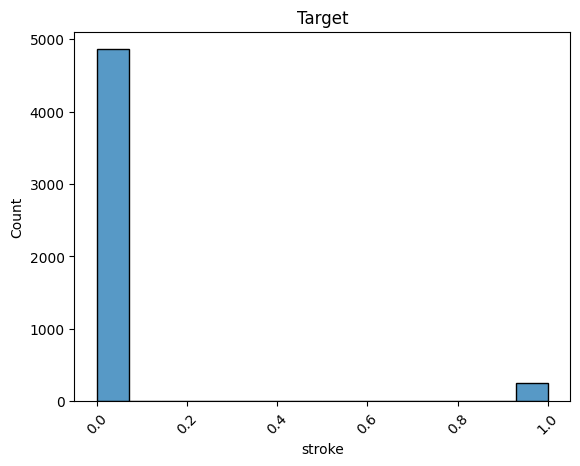

In [13]:
#Visual for the target

ax = sns.histplot(data = df, x = 'stroke')
ax.tick_params(axis = 'x', rotation = 45);
ax.ticklabel_format(style = 'plain');
ax.set_title('Target');

The count of people with no stroke is more that those that were attacked by a stroke

### Features

###### Ploting categorical features using value coounts

In [14]:
# Saving the value counts for Gender
val_counts = df['gender'].value_counts()
val_counts

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

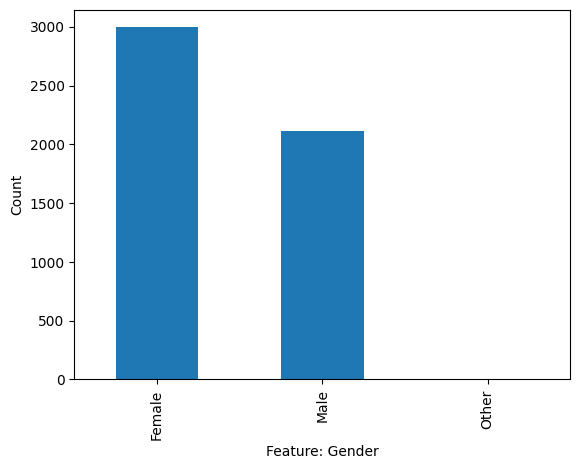

In [15]:
# Plot value counts as a bar graph
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Count");
ax.set_xlabel("Feature: Gender");

There are more females than males in this dataset

In [16]:
# Saving the value counts for ever_married
val_counts = df['ever_married'].value_counts()
val_counts

Yes    3353
No     1757
Name: ever_married, dtype: int64

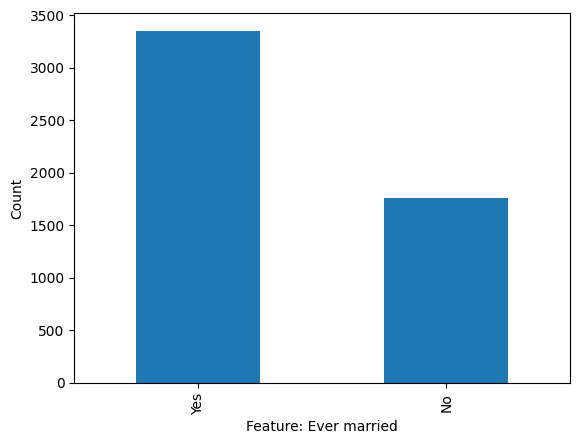

In [17]:
# Plot value counts as a bar graph
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Count");
ax.set_xlabel("Feature: Ever married");

The number of perople that got married is more that those that are ever married.

In [18]:
# Saving the value counts for work_type
val_counts = df['work_type'].value_counts()
val_counts

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

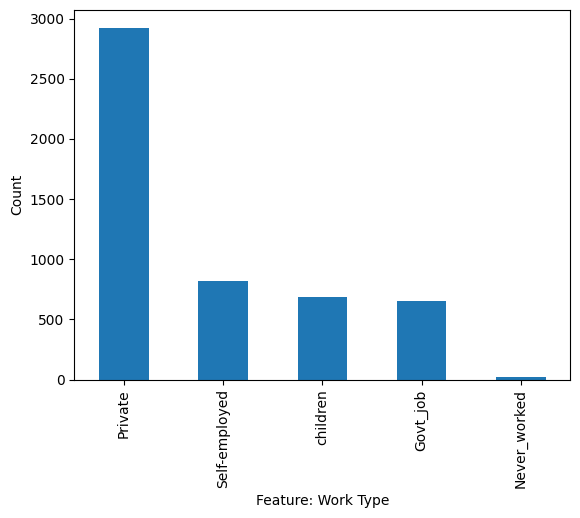

In [19]:
# Plot value counts as a bar graph
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Count");
ax.set_xlabel("Feature: Work Type");

The rate of unemployment is less

In [20]:
# Saving the value counts for Residence_type
val_counts = df['Residence_type'].value_counts()
val_counts

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

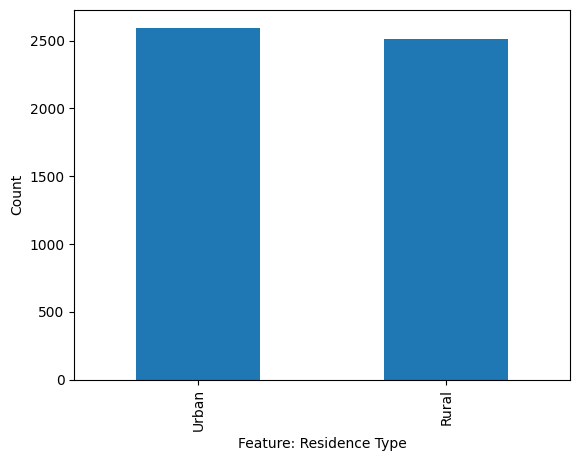

In [21]:
# Plot value counts as a bar graph
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Count");
ax.set_xlabel("Feature: Residence Type");

There is a 5 - 10% difference in the residence type

In [22]:
# Saving the value counts for smoking_status
val_counts = df['smoking_status'].value_counts()
val_counts

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

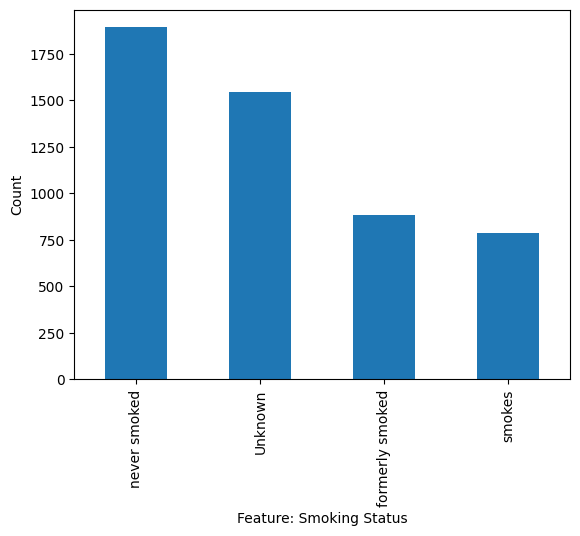

In [23]:
# Plot value counts as a bar graph
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Count");
ax.set_xlabel("Feature: Smoking Status");

Most people in this dataset are smokers

###### Numerical features

*   Numerical features will be plotted using sns
*   Histograms give a much clearer view of what's happening on numerical columns



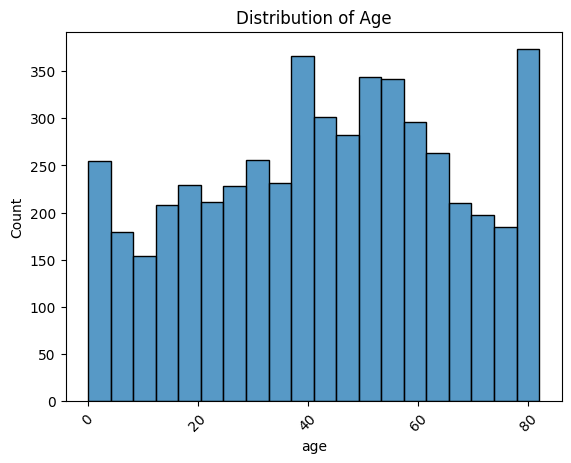

In [24]:
#Distribution of age
ax = sns.histplot(data = df, x ='age')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of Age');

The persons of the age of 12 have the least count compared to other age groups

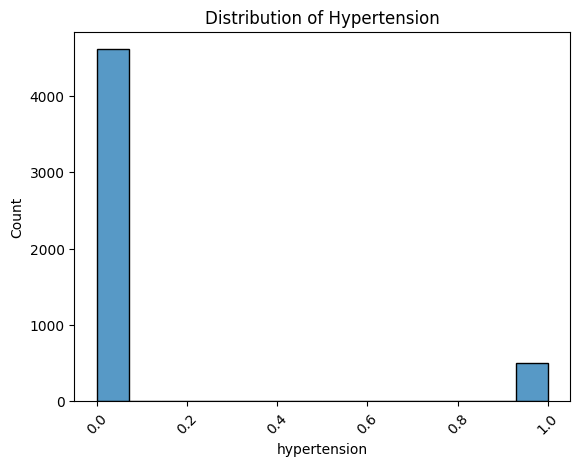

In [25]:
#Distribution of hypertension
ax = sns.histplot(data = df, x ='hypertension')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of Hypertension');

There is a least number of people with hypertension

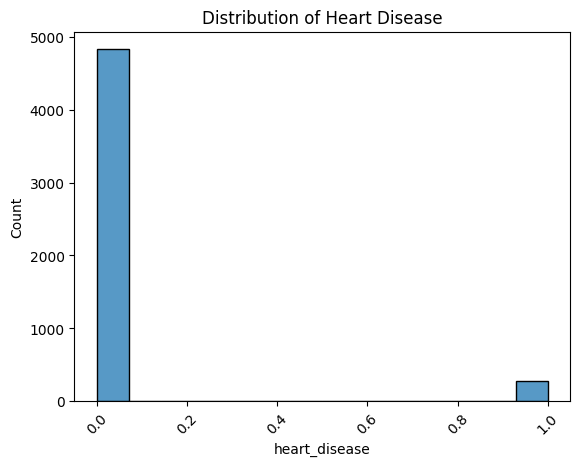

In [26]:
#Distribution of heart_disease
ax = sns.histplot(data = df, x ='heart_disease')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of Heart Disease');

Majority of the people are not diagnosed with a heart disease

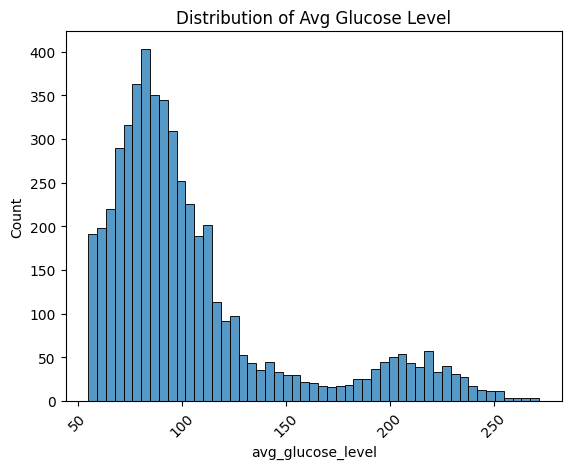

In [27]:
#Distribution of avg_glucose_level
ax = sns.histplot(data = df, x ='avg_glucose_level')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of Avg Glucose Level');

The highest count of the avarage glucose level is between 50 and 100

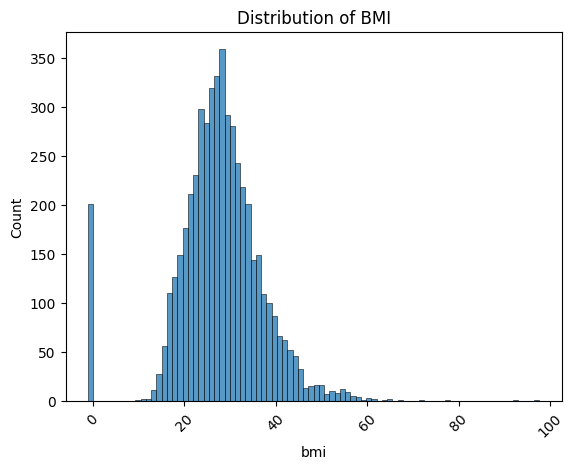

In [28]:
#Distribution of bmi
ax = sns.histplot(data = df, x ='bmi')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of BMI');

28 has the hoghest count of BMI

## Correlation heatmap

In [29]:
#I will be using the numerical columns to identify if there is any strong relation between our target and other numerical features
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.00,0.28,0.26,0.24,0.21,0.25
hypertension,0.28,1.00,0.11,0.17,0.07,0.13
heart_disease,0.26,0.11,1.00,0.16,-0.03,0.13
avg_glucose_level,0.24,0.17,0.16,1.00,0.08,0.13
bmi,0.21,0.07,-0.03,0.08,1.00,-0.05
stroke,0.25,0.13,0.13,0.13,-0.05,1.00


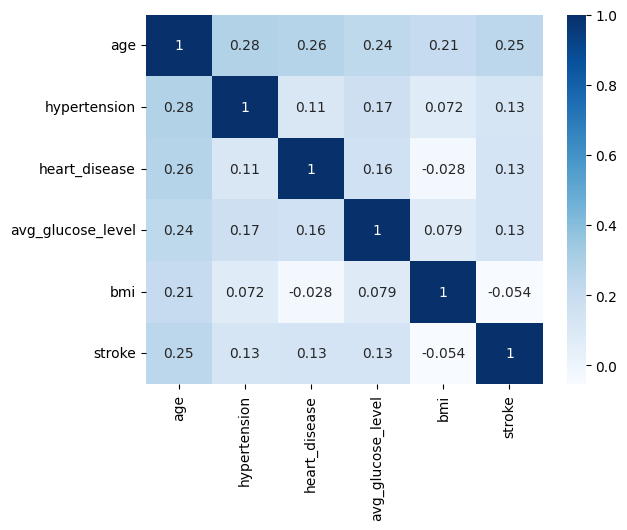

In [30]:
#I will be including the annotations on the heatmap so that it can be easier ro read the relationship
sns.heatmap(corr, cmap = 'Blues', annot = True);

There is a low correlation between the features and the target as there is no correlation coefficient that is greater than 0.5. Hence this is a negative correlation.

## Multivariate Plot


*   Since we have already seen the relationship between the target and the numerical values, the multivariate plot will be between target and the categorical values




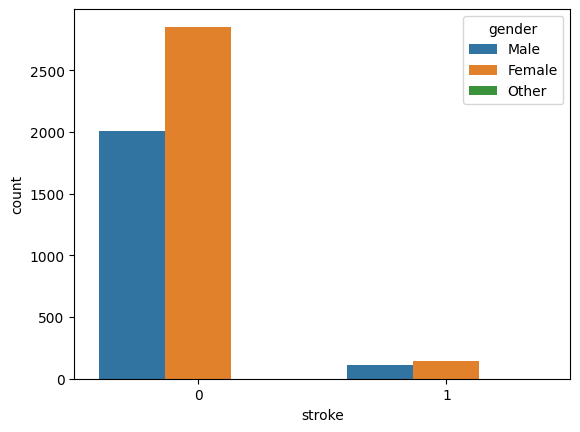

In [31]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df, x='stroke', hue='gender')

The count of males with stroke is slightly less than that of females

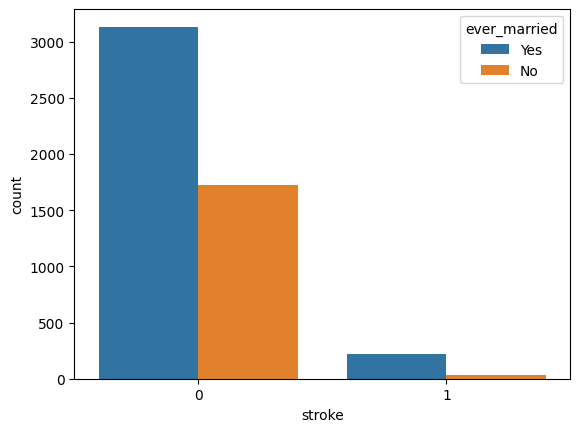

In [32]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df, x='stroke', hue='ever_married')

The people who are most likely to have stroke are those that are married

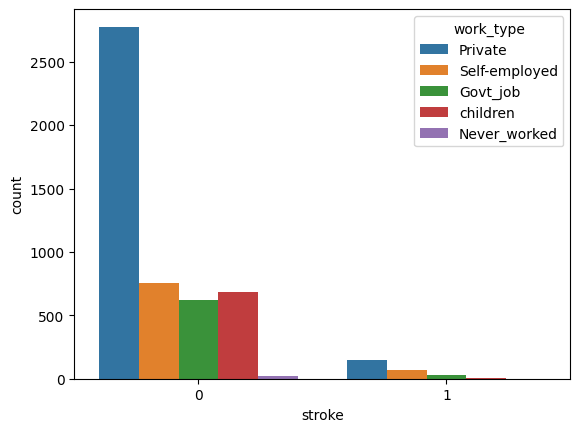

In [33]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df, x='stroke', hue='work_type')

The highest count of people who do not have stroke are those working for private companies.

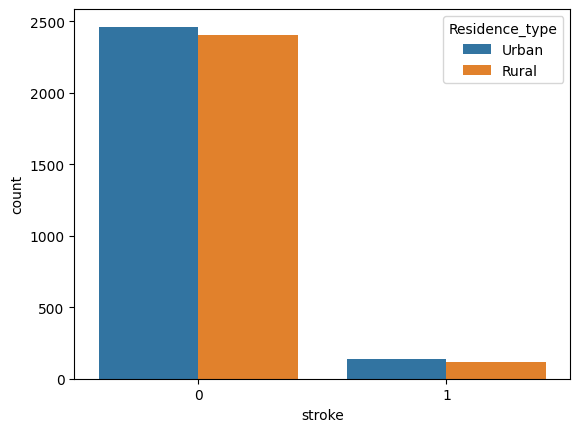

In [34]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df, x='stroke', hue='Residence_type')

The count of people living in urban arear is slightly higher than those residing in the rural arear.

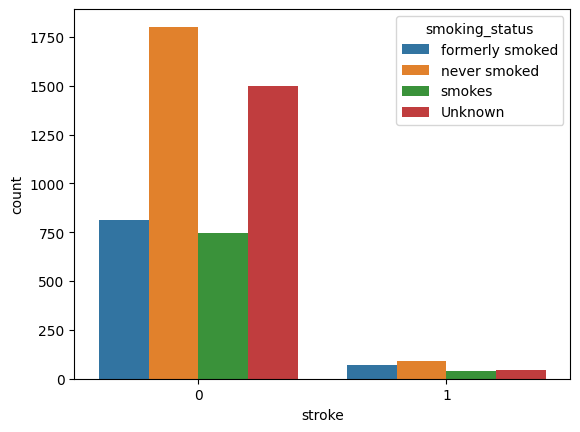

In [35]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df, x='stroke', hue='smoking_status')

The count of people who never smoked is higher with people with and without stroke.

#### Choosing Two Visuals from my analysis

In [36]:
#Revisiting the bar plots
# Use groupby to calculate the average for each category
stroke_vs_evermarried = df.groupby('ever_married')['stroke'].mean()
stroke_vs_evermarried

ever_married
No     0.016505
Yes    0.065613
Name: stroke, dtype: float64

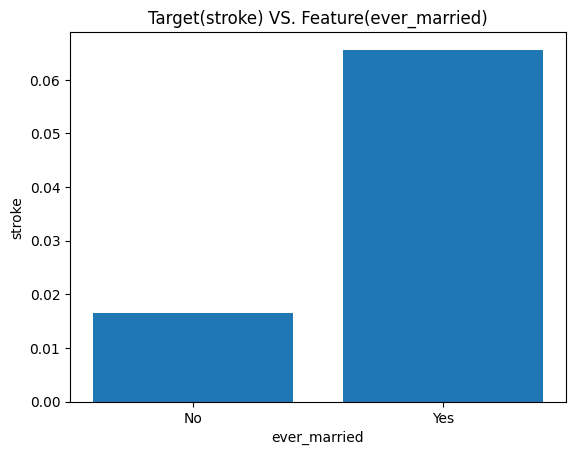

In [37]:
# Plot the average of each as a bar
fig, ax = plt.subplots()
ax.bar(stroke_vs_evermarried.index, stroke_vs_evermarried.values);
ax.set_ylabel('stroke')
ax.set_xlabel("ever_married");
ax.set_title('Target(stroke) VS. Feature(ever_married)');

In [38]:
# Use groupby to calculate the average for each category
stroke_vs_worktype = df.groupby('work_type')['stroke'].mean()
stroke_vs_worktype

work_type
Govt_job         0.050228
Never_worked     0.000000
Private          0.050940
Self-employed    0.079365
children         0.002911
Name: stroke, dtype: float64

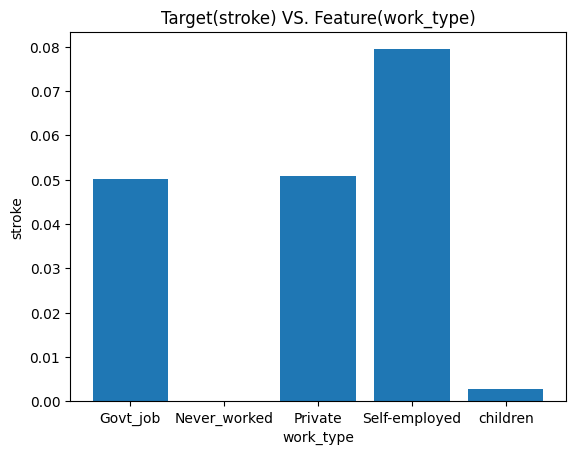

In [39]:
# Plot the average of each as a bar
fig, ax = plt.subplots()
ax.bar(stroke_vs_worktype.index, stroke_vs_worktype.values);
ax.set_ylabel('stroke')
ax.set_xlabel("work_type");
ax.set_title('Target(stroke) VS. Feature(work_type)');

###### The trends on both visuals is that it is evident that stroke is caused by stress.


*   The highest average of people with stroke are married, this could be caused by a lot of things, could be that they are worried about the future of their family, could be unfaithful partner.
*   On the second visual, the highest average stroke is with the self_employed workers, this again can be a stress caused by their businesses not doing well in certain months or not being able to cope with their day to day activities.



# Modeling

#### Pre-processing

In [40]:
# Creating a copy of the data for modeling
stroke = df_stroke.copy()

In [41]:
# Defining X and y
y = df_stroke['stroke'].copy()
X = df_stroke.drop(columns = 'stroke').copy()

In [42]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [43]:
# Selector of numerical columns
num_cols = X_train.select_dtypes('number').columns
print('Numeric Columns:', num_cols)

# Imputing null numeric values
num_imputer = SimpleImputer(strategy = 'mean')

Scaler = StandardScaler()

# Creating a pipeline
num_pipeline = make_pipeline(num_imputer, Scaler)

# creating a tuple
num_tuple = ('numeric',num_pipeline, num_cols)

Numeric Columns: Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')


In [45]:
# Selector of categorical values
cat_col = X_train.select_dtypes('object').columns
print("Categorical Columns:", cat_col)

# Imputing categorical values
cat_imputer = SimpleImputer(strategy = 'constant', fill_value = 'NA')

# Transformer
cat = OneHotEncoder(handle_unknown = 'ignore', sparse_output= False)

# Creating a categorical pipeline
cat_pipeline = make_pipeline(cat_imputer, cat)

# Creating a tuple
cat_tuple = ('categorical',cat_pipeline, cat_col)

Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [46]:
# Intatiate the make column transformer
preprocessor = ColumnTransformer([num_tuple, cat_tuple],
                                  verbose_feature_names_out= False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [47]:
# Fit the preprocessor on X_train
preprocessor.fit(X_train)

X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3832 entries, 4505 to 860
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3832 non-null   float64
 1   age                             3832 non-null   float64
 2   hypertension                    3832 non-null   float64
 3   heart_disease                   3832 non-null   float64
 4   avg_glucose_level               3832 non-null   float64
 5   bmi                             3832 non-null   float64
 6   gender_Female                   3832 non-null   float64
 7   gender_Male                     3832 non-null   float64
 8   ever_married_No                 3832 non-null   float64
 9   ever_married_Yes                3832 non-null   float64
 10  work_type_Govt_job              3832 non-null   float64
 11  work_type_Never_worked          3832 non-null   float64
 12  work_type_Private               

#### KNN MODEL

In [50]:
# KNN MODEL

# Create an instance of the model
knn = KNeighborsClassifier()

Scaler2 = StandardScaler()

# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [51]:
#Evaluating
knn_train_pred = knn_pipe.predict(X_train)
knn_test_pred = knn_pipe.predict(X_test)

In [52]:
# Print the classification reports
labels = ['No stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, knn_train_pred, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_test_pred, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No stroke       0.96      1.00      0.98      3663
      Stroke       0.79      0.13      0.22       169

    accuracy                           0.96      3832
   macro avg       0.87      0.56      0.60      3832
weighted avg       0.95      0.96      0.95      3832

Test Report
              precision    recall  f1-score   support

   No stroke       0.94      1.00      0.97      1198
      Stroke       0.50      0.06      0.11        80

    accuracy                           0.94      1278
   macro avg       0.72      0.53      0.54      1278
weighted avg       0.91      0.94      0.91      1278



In [53]:
#creating a custom function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label = 'test_data',
                           figsize=(15,5), normalize='true',
                           cmap='Greens', thresh= .5):
  fig, axes = plt.subplots(1,2, figsize=figsize)

  #Get the predictions
  y_proba = model.predict_proba(X_test)
  y_pred = [1 if X[1] > thresh else 0 for c in y_proba]

  ##print classification report for the data
  print('___'*20)
  print(f'[i] CLASSIFICATION REPORT FOR: {label}')
  print('___'*20)

  print(classification_report(y_test, y_pred))

  ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                          normalize=normalize, cmap=cmap,
                                          ax=axes[0])
  RocCurveDisplay.from_estimator(model, X_test, y_test,
                                 ax=axes[1])
  plt.show()

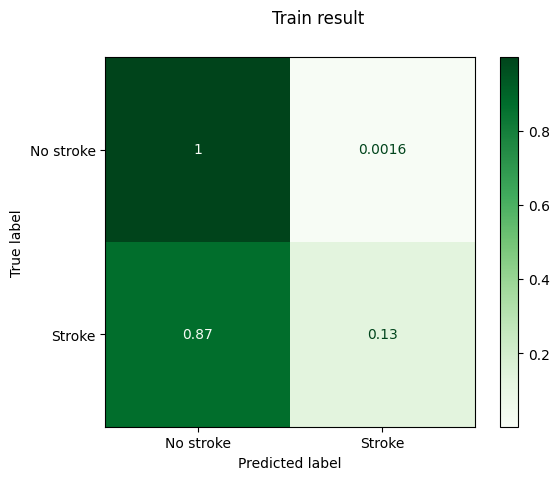

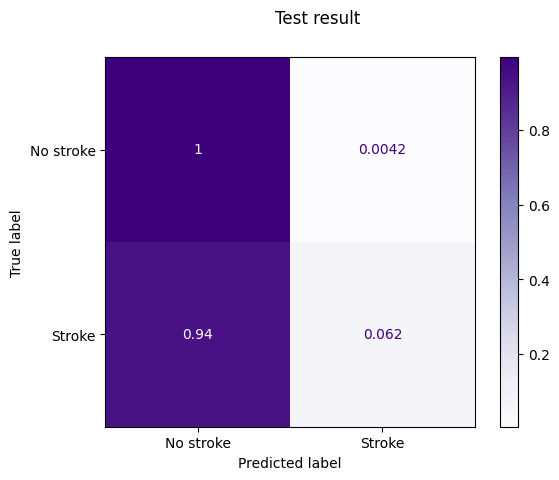

In [55]:
# Creating a confusion Matrices
model = ConfusionMatrixDisplay.from_predictions(y_train, knn_train_pred,
                                        normalize='true', display_labels=labels, cmap='Greens')
plt.suptitle('Train result');

model = ConfusionMatrixDisplay.from_predictions(y_test, knn_test_pred,
                                        normalize='true', display_labels=labels, cmap='Purples')
plt.suptitle('Test result');

#### Tuning

In [56]:
# Display hyperparameter
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
          'bmi'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
     

In [57]:
# Dictionary of parameters

params = {'kneighborsclassifier__n_neighbors': range(1,20),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [59]:
# Tune GridSearchCV

knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 20),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [61]:
# Getting the best params, score and estimater
knn_gs.best_params_
knn_gs.best_score_
best_knn = knn_gs.best_estimator_

In [62]:
# Checking the best parameter
train_pred = best_knn.predict(X_train)
test_pred = best_knn.predict(X_test)

In [63]:
# Train and test results
print('Train\n', classification_report(y_train, train_pred))
print('Test\n', classification_report(y_test, test_pred))

Train
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3663
           1       1.00      1.00      1.00       169

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

Test
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       1.00      0.04      0.07        80

    accuracy                           0.94      1278
   macro avg       0.97      0.52      0.52      1278
weighted avg       0.94      0.94      0.91      1278



Text(0.5, 1.0, 'Test Results')

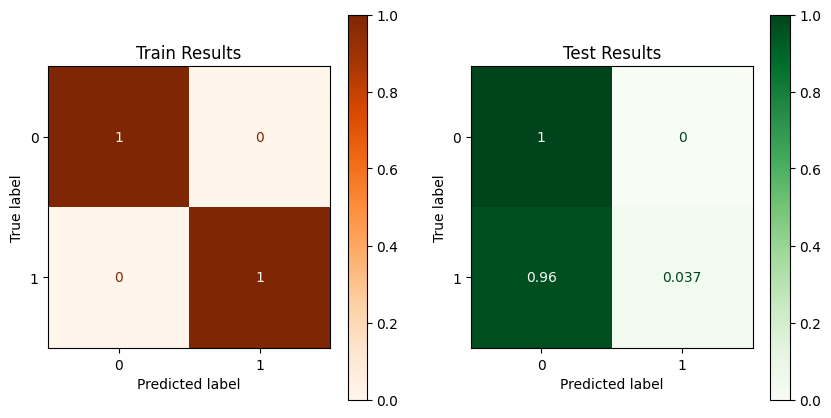

In [64]:
# Test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_pred,
                                        ax=axes[0], cmap='Oranges',normalize='true')

axes[0].set_title('Train Results')
ConfusionMatrixDisplay.from_predictions(y_test, test_pred,
                                        ax=axes[1], cmap='Greens',normalize='true')

axes[1].set_title('Test Results')

#### Random Forest

In [65]:
# Custom function
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [68]:
# Default random forest
rf = RandomForestRegressor(random_state = 42)

# Radom pipeline
rf_pipe = make_pipeline(preprocessor, rf)

# Fit model pipeline on training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [69]:
# Print the classification reports
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.030
- MSE = 0.006
- RMSE = 0.076
- R^2 = 0.861

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.096
- MSE = 0.055
- RMSE = 0.235
- R^2 = 0.062


##### GridSearchCV Tuning

In [70]:
# Parameters for tuning Random Forest
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
          'bmi'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
     

In [71]:
# Defining param grid
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
          }

In [72]:
# Defining the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs = -1, cv = 3, verbose = 1)

In [73]:
# Fitting the gridserach
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [74]:
# Checking for best parameters
best_rf = gridsearch.best_estimator_

In [75]:
# Refitting the best model
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.063
- MSE = 0.025
- RMSE = 0.159
- R^2 = 0.397

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.092
- MSE = 0.053
- RMSE = 0.229
- R^2 = 0.105


# PCA

In [77]:
# We must scale the data for use in PCA
scaler = StandardScaler() # the scaler used in preprocessing starts with a capital letter S

# We are asking for the number of Principal Components that will retain 95% of the variance in the original features
pca = PCA(n_components = .95)

# Preprocessing Pipeline, so we can reuse it for other model types:
# We have only numeric data, so there is no need for a column transformer.
# We can perform the same processing steps on all columns.
pca_processing = make_pipeline(scaler, pca)

In [80]:
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train)))
  print('Test Report:', classification_report(y_test, model.predict(X_test)))

  cm = confusion_matrix(y_test, model.predict(X_test))

  plt.figure(figsize=(15, 15))
  heatmap(cm, annot=True)
  plt.xlabel('Predicted', fontsize=40)
  plt.ylabel('True', fontsize=40)
  plt.show()

In [82]:
%%time
# Without PCA
knn = KNeighborsClassifier()

# Creating a pipeline
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)

CPU times: user 45.1 ms, sys: 0 ns, total: 45.1 ms
Wall time: 65 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3663
           1       0.79      0.13      0.22       169

    accuracy                           0.96      3832
   macro avg       0.87      0.56      0.60      3832
weighted avg       0.95      0.96      0.95      3832

Test Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.50      0.06      0.11        80

    accuracy                           0.94      1278
   macro avg       0.72      0.53      0.54      1278
weighted avg       0.91      0.94      0.91      1278



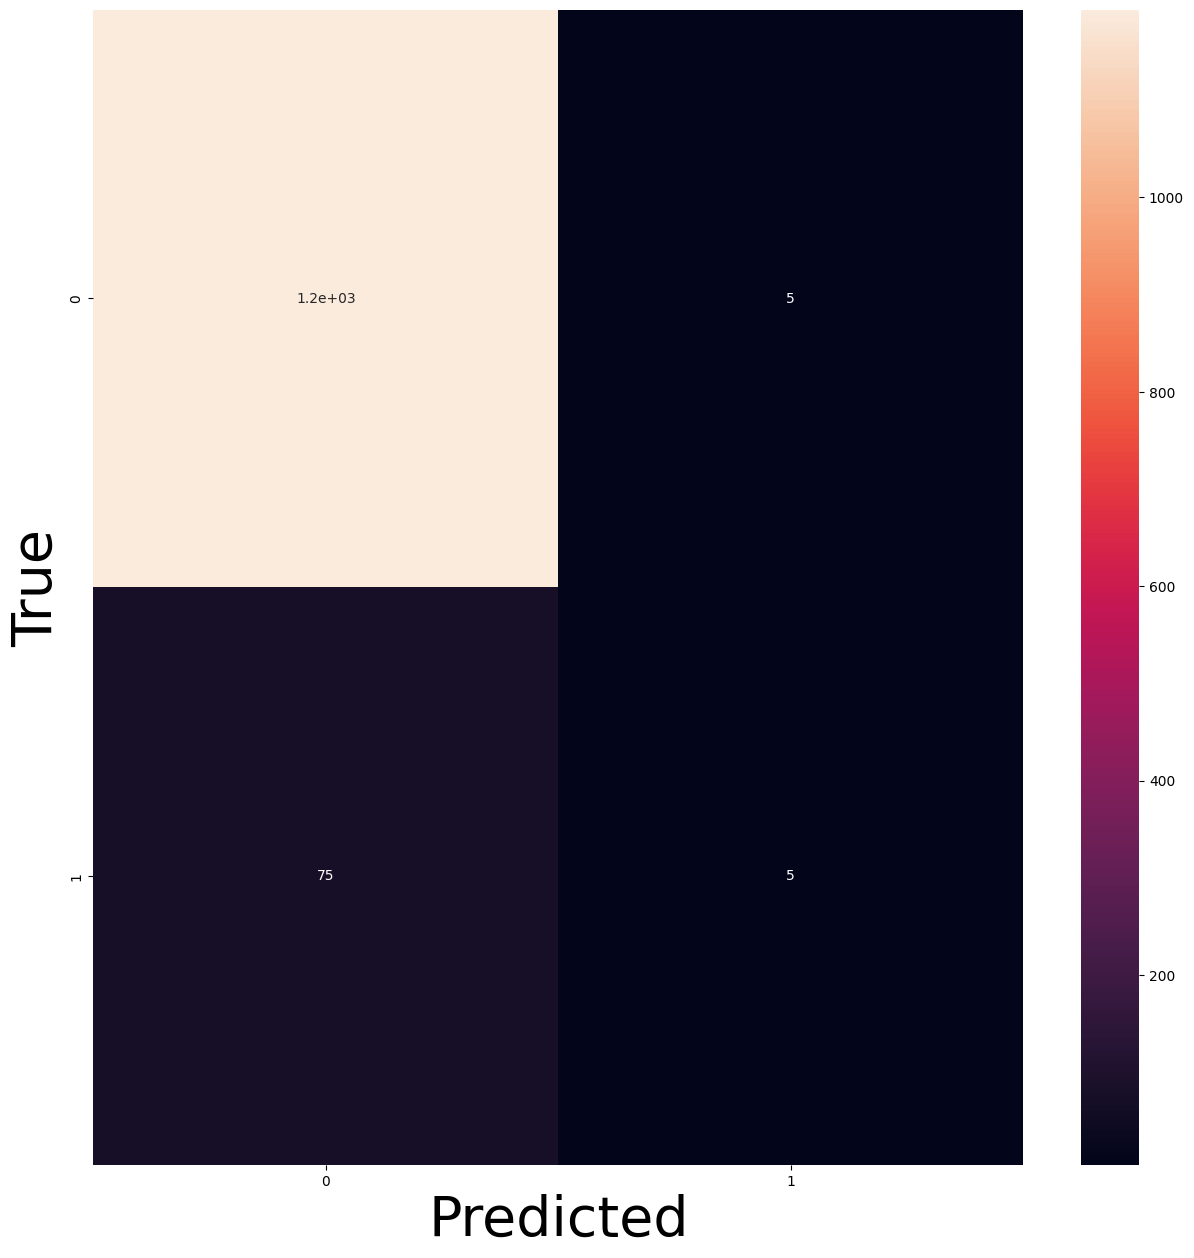

CPU times: user 948 ms, sys: 202 ms, total: 1.15 s
Wall time: 846 ms


In [83]:
%%time
# evaluating the pipeline
eval_classification(knn_pipe, X_train, X_test, y_train, y_test)

In [85]:
%%time
# With PCA
knn_pca_pipe = make_pipeline(preprocessor, pca, knn)

# fit the pipeline
knn_pca_pipe.fit(X_train, y_train)

CPU times: user 61.7 ms, sys: 9.53 ms, total: 71.2 ms
Wall time: 141 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3663
           1       0.85      0.10      0.18       169

    accuracy                           0.96      3832
   macro avg       0.91      0.55      0.58      3832
weighted avg       0.96      0.96      0.94      3832

Test Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.50      0.05      0.09        80

    accuracy                           0.94      1278
   macro avg       0.72      0.52      0.53      1278
weighted avg       0.91      0.94      0.91      1278



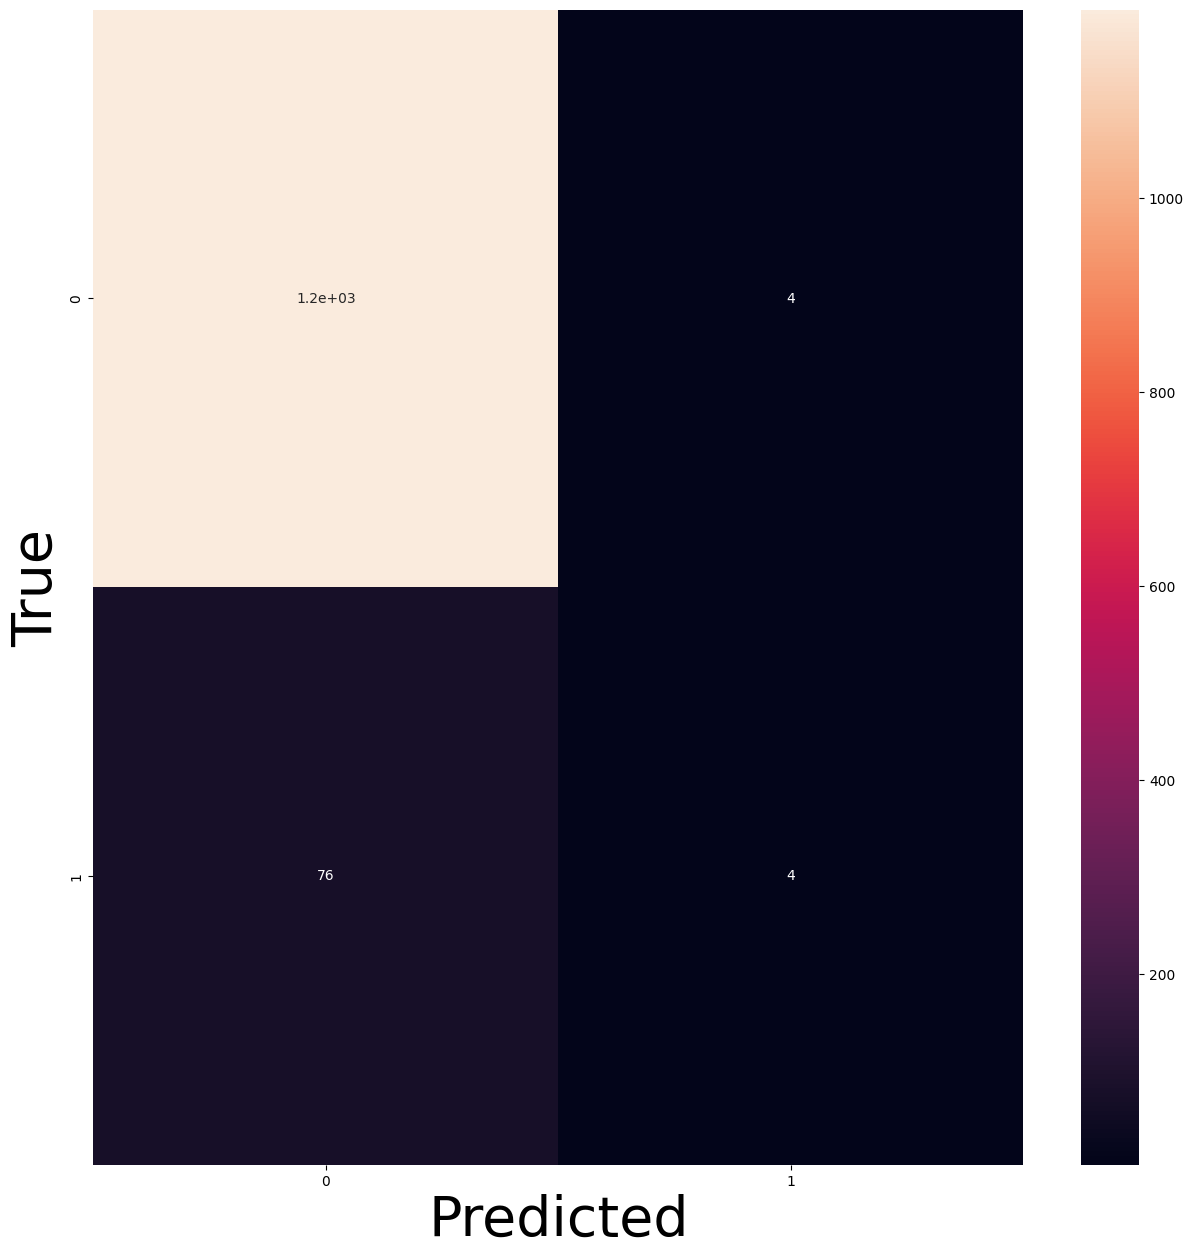

CPU times: user 1.04 s, sys: 442 ms, total: 1.48 s
Wall time: 1.04 s


In [86]:
%%time
# evaluate the pipeline

eval_classification(knn_pca_pipe, X_train, X_test, y_train, y_test)

#### Tuning with GridSearchCV

In [87]:
%%time
knn_pca_pipe.get_params()

CPU times: user 964 µs, sys: 0 ns, total: 964 µs
Wall time: 972 µs


{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
          'bmi'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
     

In [88]:
knn_grid = {'pca__n_components':[.5, .7, .9, None],
            'kneighborsclassifier__n_neighbors':[1, 5, 10, 20]}

knn_grid = GridSearchCV(knn_pca_pipe, param_grid=knn_grid, cv=3)

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3663
           1       0.90      0.05      0.10       169

    accuracy                           0.96      3832
   macro avg       0.93      0.53      0.54      3832
weighted avg       0.96      0.96      0.94      3832

Test Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       1.00      0.03      0.05        80

    accuracy                           0.94      1278
   macro avg       0.97      0.51      0.51      1278
weighted avg       0.94      0.94      0.91      1278



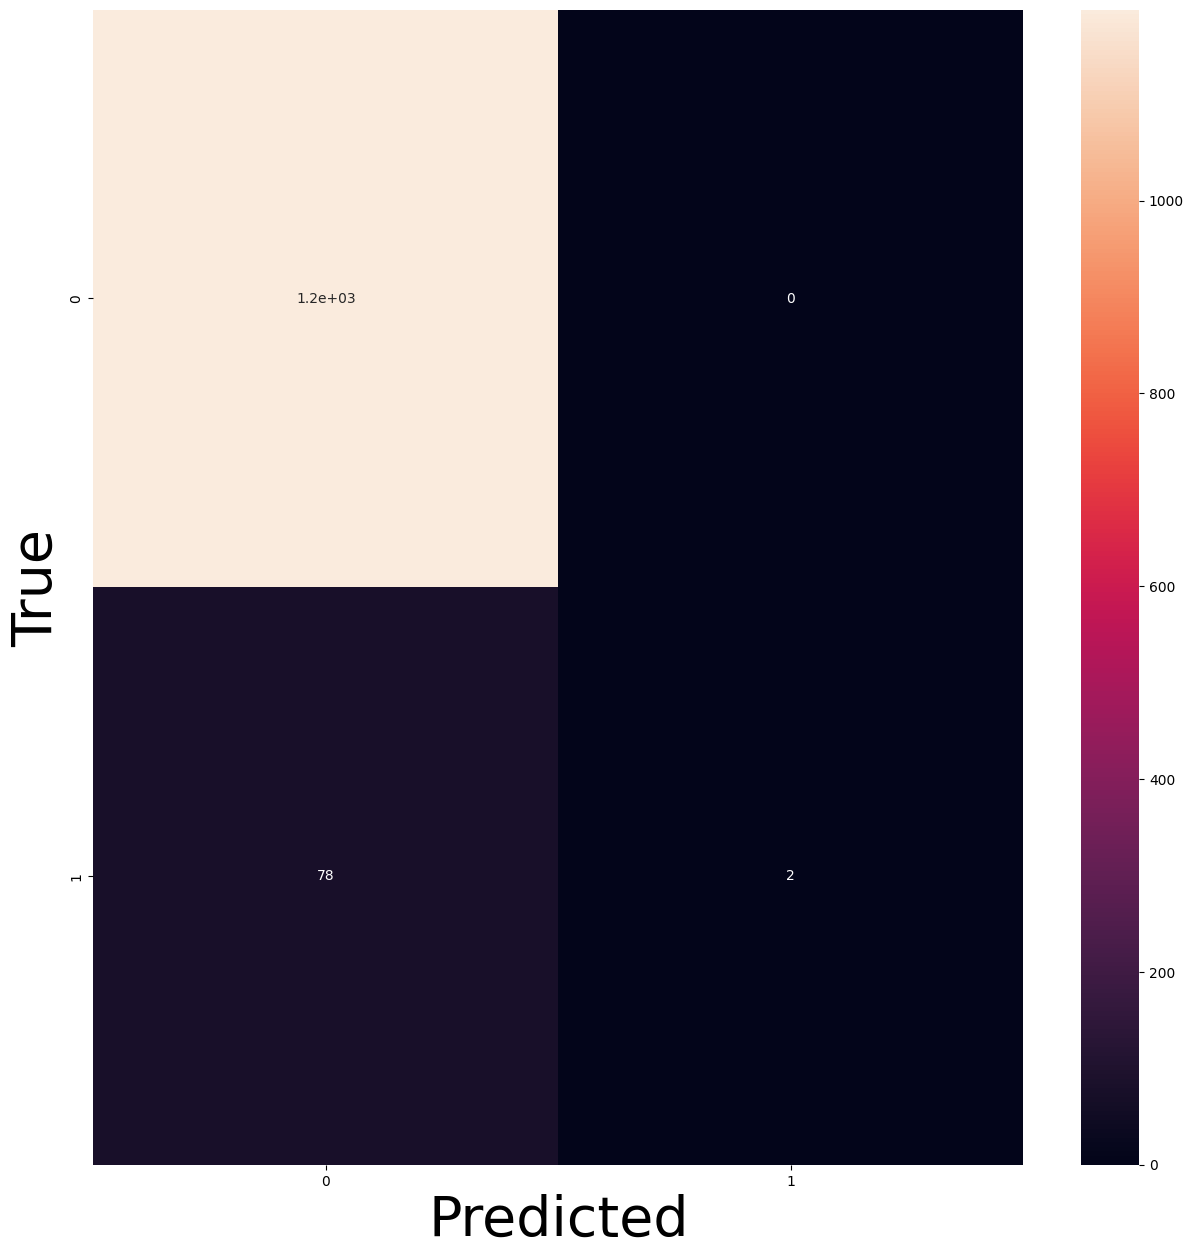

CPU times: user 11.2 s, sys: 4.97 s, total: 16.2 s
Wall time: 11.5 s


In [89]:
%%time
knn_grid.fit(X_train, y_train)

eval_classification(knn_grid, X_train, X_test, y_train, y_test)

The tuned PCA data has the fastest system turnaround time, computation has been sped up. PCA helps to also reduce the number of columns.

I'd select the KNN model- with PCA and the Confusion matrix because it gives a better idea of the performance made compared to classification accuracy